# Analisis del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import IsolationForest

## Configuración de estilo.

In [2]:
%matplotlib inline
sns.set_theme(style="white")

## Carga de datos

In [3]:
df = pd.read_csv('archivo_limpio.csv')

# PROPUESTA 1: ELASTICIDAD DE PRECIO POR TIENDA (KPI DE COMPETITIVIDAD)

Calculamos la desviación del precio de cada tienda vs el promedio del mercado

/tmp/ipykernel_12220/2850978838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_tiendas, x='desviacion_pct', y='nombre_tienda', palette='coolwarm')


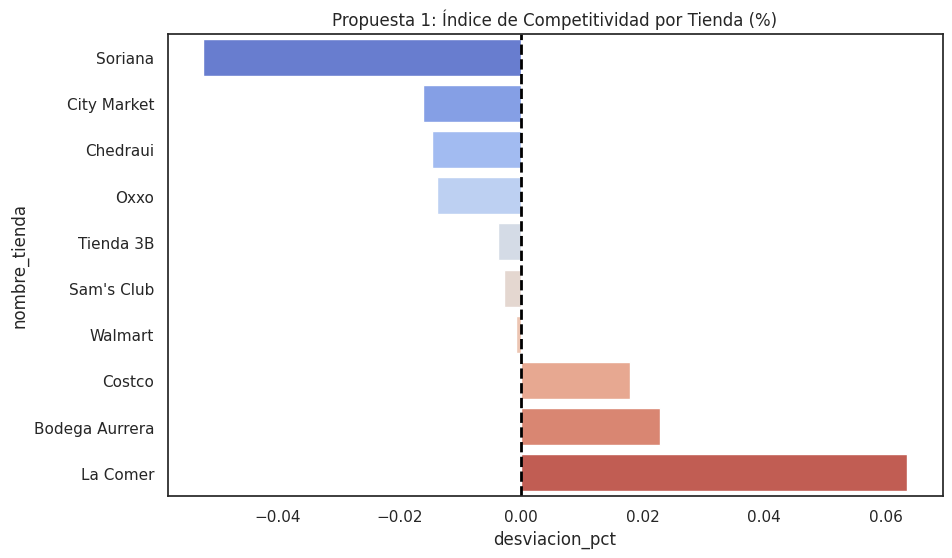

In [4]:
mercado_avg = df.groupby('nombre_producto')['precio_normalizado'].mean().rename('avg_mercado')
df_elasticidad = df.merge(mercado_avg, on='nombre_producto')
df_elasticidad['desviacion_pct'] = (df_elasticidad['precio_normalizado'] - df_elasticidad['avg_mercado']) / df_elasticidad['avg_mercado'] * 100

# Ranking de tiendas por "Costo de Vida" interno
ranking_tiendas = df_elasticidad.groupby(['nombre_tienda', 'categoria_tienda'])['desviacion_pct'].mean().sort_values().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ranking_tiendas, x='desviacion_pct', y='nombre_tienda', palette='coolwarm')
plt.axvline(0, color='black', lw=2, ls='--')
plt.title('Propuesta 1: Índice de Competitividad por Tienda (%)')
plt.show()

# PROPUESTA 2: CANIBALIZACIÓN GEOGRÁFICA (INTERACTIVO)

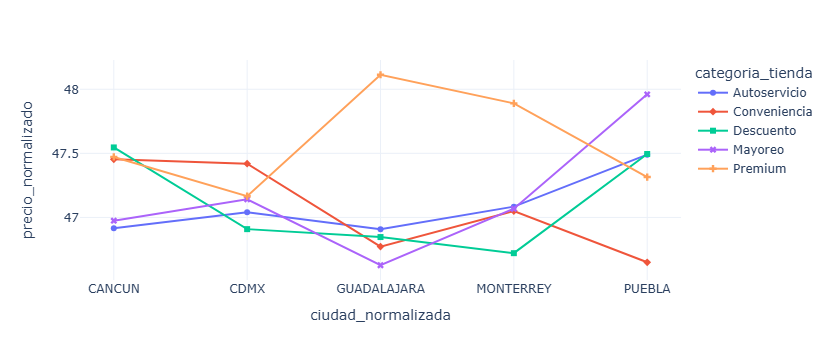

In [5]:
canibalizacion = df.groupby(['ciudad_normalizada', 'categoria_tienda'])['precio_normalizado'].mean().reset_index()

fig = px.line(canibalizacion, x='ciudad_normalizada', y='precio_normalizado', color='categoria_tienda',
              symbol='categoria_tienda', markers=True)
fig.update_layout(template='plotly_white', hovermode='x unified')
fig.show()

# PROPUESTA 3: FRACTURAS ESTRATÉGICAS CON IA
Reducimos contaminación para ser más precisos con las anomalías

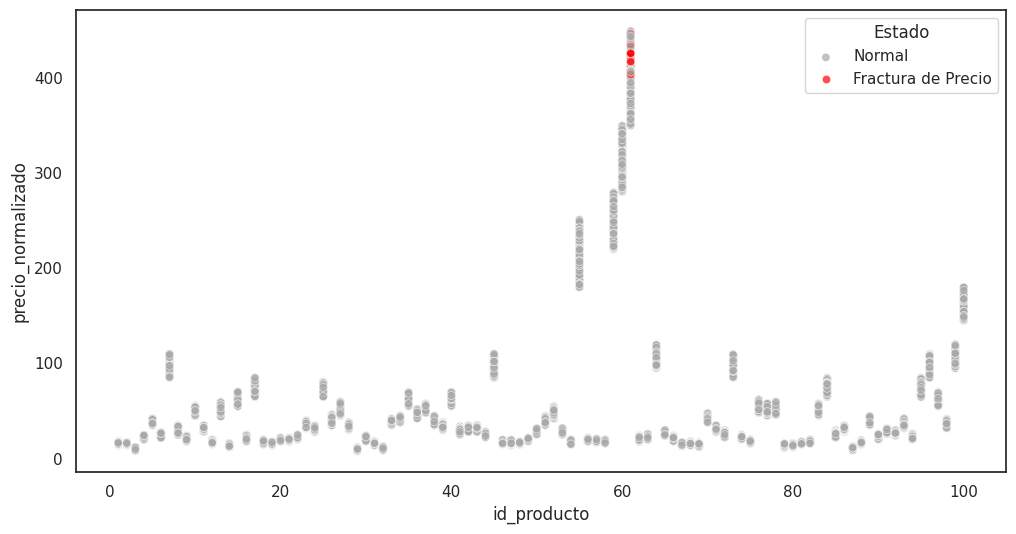

In [10]:
# --- PROPUESTA 3: FRACTURAS ESTRATÉGICAS CON IA ---
# Reducimos contaminación para ser más precisos con las anomalías
model = IsolationForest(contamination=0.001, random_state=42)
df_sample = df.sample(n=50000) if len(df) > 50000 else df
df_sample['score_anomalia'] = model.fit_predict(df_sample[['precio_normalizado', 'mes', 'id_producto']])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sample, x='id_producto', y='precio_normalizado', 
                hue='score_anomalia', palette={1: '#A9A9A9', -1: '#FF0000'}, alpha=0.7)
plt.legend(title='Estado', labels=['Normal', 'Fractura de Precio'])
plt.show()

# TABLAS DE RESULTADOS

In [9]:
print("ANÁLISIS DE COMPETITIVIDAD POR CADENA")
display(ranking_tiendas.style.background_gradient(cmap='RdYlGn_r', subset=['desviacion_pct']))

print("\nPRODUCTOS 'GANCHO' (MENOR VARIANZA NACIONAL)")
productos_faro = df.groupby('nombre_producto')['precio_normalizado'].std().sort_values().head(10)
display(productos_faro)

ANÁLISIS DE COMPETITIVIDAD POR CADENA


,nombre_tienda,categoria_tienda,desviacion_pct
0,Soriana,Autoservicio,-0.052349
1,City Market,Premium,-0.016101
2,Chedraui,Autoservicio,-0.014682
3,Oxxo,Conveniencia,-0.013867
4,Tienda 3B,Descuento,-0.003803
5,Sam's Club,Mayoreo,-0.002852
6,Walmart,Autoservicio,-0.000828
7,Costco,Mayoreo,0.017867
8,Bodega Aurrera,Descuento,0.022799
9,La Comer,Premium,0.063542



PRODUCTOS 'GANCHO' (MENOR VARIANZA NACIONAL)


nombre_producto
Refresco Fanta 600ml      0.857690
Pepsi 600ml               0.859936
Coca-Cola 600ml           0.863134
Refresco Manzanita Sol    0.864636
Refresco Sprite 600ml     0.867284
Refresco Fresca 600ml     0.867690
Sopa Maruchan Pollo       1.134259
Sabritas Clásicas         1.134324
Sal La Fina               1.138872
Gansito Marinela          1.141884
Name: precio_normalizado, dtype: float64